<div class="alert alert-block alert-success">
    <p>Niniejszy program pobiera plik <i>tldr.txt</i> z folderu użytkownika Pobieranie i przekształca go na użyteczną bazę danych. </p>
    <p>Do użytku są dwie funkcjie <b>szukanieKc()</b> oraz <b>karty_od_uzytkownika()</b></p>
    <p>Więcej szczegółów poniżej</p>
</div>

<div class="alert alert-block alert-warning">
    <p>Aby użyć jakiejkolwiek funkcji najpierw należy uruchomić cały program by przekonwertował dane</p>
    <p>W przeciwnym wypadku format tekstu nie będzie się zgadzał i żadna z funkcji nie zadziała</p>
</div>

<div class="alert alert-block alert-danger">
    <div  style="text-align:center">
        <h1>!! Uwaga !!</h1>
            <font size=3>Nie zmieniaj parametrów po nazwie użytkownia w poniższej funkji!</font>
        </div>
</div>

##  S.wl <font color='green'>JarMar</font> nie tak tak tak tak

In [1]:
import os
import re
import webbrowser

username = os.getlogin()
downloads_path = os.path.join('C:\\Users', username, 'Downloads')
file_path = os.path.join(downloads_path, 'tldr.txt')
file_path_altered = os.path.join(downloads_path, 'tldr_altered.txt')

data_list = []

with open(file_path, mode='r', encoding='utf8') as plik:
    current_data = None

    for x in plik:
        if x.startswith('????', 3) or x.startswith('\n'):
            continue
        if x.startswith(':', 3):
            continue
        if x.startswith('**'):
            if current_data:
                data_list.append(current_data)

            name_match = re.search(r'\[([^\]]+)\]', x)
            kc_match = re.search(r'KC:\s*(\d+)', x)
            id_match = re.search(r'character/\s*(\d+)', x)
            name = name_match.group(1) if name_match else 'Unknown'
            kc = kc_match.group(1) if kc_match else 'Unknown'
            index = id_match.group(1) if id_match else 'Unknown'
            current_data = {
                "name": str(name),
                'ID': int(index),
                "kc": int(kc),
                "users": []
            }
        else:
            if x.count(']')>2:
                nick_match = re.search(r'\[(.*?)\]', x)
                if nick_match and current_data:
                    nick = nick_match.group(1)
                    current_data["users"].append(nick)
                else:
                    nick_match = re.search(r'^\d+:\s+([^:\s]+)', x)
                    if nick_match and current_data:
                        nick = nick_match.group(1)
                        current_data["users"].append(nick)
    if current_data:
        data_list.append(current_data)

with open(file_path_altered, mode='w', encoding='utf8') as nowy_plik:
    for i, data in enumerate(data_list, 1):
        line = '_' * 50 + '\n'
        nowy_plik.write(line)
        nowy_plik.write(f"#{i} | {data['name']} | ID: {data['ID']} | kc: {data['kc']} | posiada: {len(data['users'])}\n")
        nowy_plik.write('\n')
        
        for user in data["users"]:
            nowy_plik.write(user + '\n')

webbrowser.open(file_path_altered)


True

In [2]:
import pandas as pd

df = pd.DataFrame.from_dict(data_list)
df['name']=df['name'].astype(str)
df['kc']=df['kc'].convert_dtypes(convert_integer=True)
df['ID']=df['ID'].convert_dtypes(convert_integer=True)

array([[<Axes: title={'center': 'kc'}>]], dtype=object)

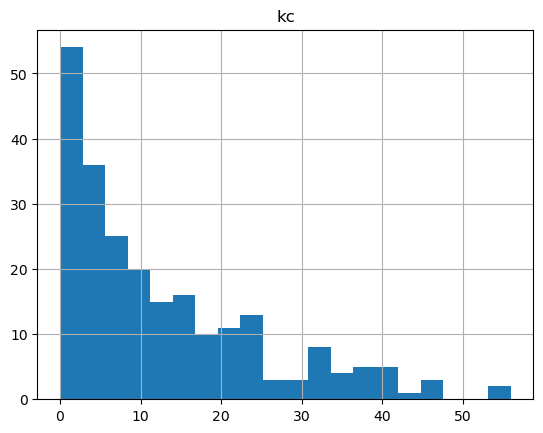

In [23]:
df.hist(column='kc',bins=20, grid=True)

In [5]:
df.head()

,name,ID,kc,users
0,Rias Gremory,23436,56,"[Laudemort, laros3, Kadzee_, DareQPlays]"
1,Ayato Kirishima,68334,12,"[MasterUnit, pekorella, Madcatlover, ReTonZaRR..."
2,Q,50742,1,"[Hurkisq, KrychuXIV, lolcrafter1100, Zielakos,..."
3,Eustass Kid,13620,4,"[paula989, PyraZiemniaczana, Ingsay, dragon8, ..."
4,Musashi,3824,3,"[Sniku, SzymonWidziszowski, GoldfishBrain, Kal..."


In [6]:
df.sort_values('kc',ascending=False).head(10).reset_index(drop=True)

,name,ID,kc,users
0,Rias Gremory,23436,56,"[Laudemort, laros3, Kadzee_, DareQPlays]"
1,Satoru Gojou,97696,54,"[Hatchkey, Krystiandfrhgsenpai, Ema23, Hurkisq..."
2,Nezuko Kamado,82447,47,"[Ema23, Teecari, proskondzio, JestJakJest, Gol..."
3,Yue,79932,46,"[XMYS, Otoczaku, Crayonami, Senpai_, Shadow202..."
4,Esdeath,33598,45,"[Kali2111, Krasnest, Loovi, Kryspek, tomasikgu..."
5,Asuna Yuuki,45276,44,"[kacper204100, Krysana, Wjerzba, Idkidei, Talu..."
6,Yuuji Itadori,97667,41,"[Misterx, iza_kicia, Ingsay, LargeMonster, Hat..."
7,Ken Kaneki,58123,41,"[DarGorN, ringoameyuri, Kaczorpl3, Hurkisq]"
8,Eris Boreas Greyrat,69544,40,"[Sebal103, Losingxcontrol, korendan, Rtopiroks..."
9,Sukuna Ryoumen,102976,40,"[Ema23, Partyganiusz, Oliwianin, Okigai]"


<div class="alert alert-block alert-info">
    <p>Pierwsza funckcja <b><font color='white'>szukanieKc()</font></b> wymaga dwóch parametrów by zadziałać. Funkcja zwraca listę kart z wybranego przedziału KC który nas interesuje.</p>
    <p>Jeżeli nie chcemy bądź nie wiemy jak wiele jakaś karta ma KC możemy wpisać <b><font color='white'>gora</font><font color='purple'>=</font><font color='green'>None</font></b>. W ten sposób funkcja bedzie ograniczona tylko od dołu</p>
</div>

In [96]:
def szukanieKc(dol=None, gora=None):
    '''
    
    dol - dolny przedział w jakim funkcja ma szukać kart
    gora - górny przedział do jakiego funkcja zwróci karty
    
    ---------
    przykład:
    
    szukanieKc(10, 15)
    przedział [10, 15] domknięty obóstronnie.
    Funkcja zwróci listę wszystkich graczy którzy posiadają daną kartę o pożądanym KC
    
    Możliwe jest niepodanie górnego bądź dolnego przedziału, 
    wówczas funkcja wybierze maksymalne bądź minimalne wartosci.
    
    '''
    if dol == None:
        dol=df['kc'].min()
    if gora == None:
        gora = df['kc'].max()
        
    question = df[(df['kc']<=gora)&(df['kc']>=dol)].sort_values("kc",ascending=False)

    print('Znaleziono ', len(question), f' kart z przedziału [{dol}, {gora}]')
    for i in range(len(question)):
        print('_'*30,)
        print('\n>',f'{i+1}.', question.iloc[i]['name'], question.iloc[i]['kc'], 'kc <\n')
        for j in range(len(question.iloc[i]['users'])):
            print('     '+question.iloc[i]['users'][j])

In [99]:
szukanieKc(12, 14)

Znaleziono  19  kart z przedziału [12,14]
______________________________

> 1. Kishibe  14 kc <

     GoldfishBrain
     LargeMonster
     LargeMonster
     Hatchkey
     Krigee
     luniaczek_07
     Kaszalotto
______________________________

> 2. Eta  14 kc <

     Tankomir
     Tymek97517
     Ingsay
______________________________

> 3. Beatrix  14 kc <

     TheBabatunde
______________________________

> 4. Epsilon  14 kc <

     Sniku
     Losingxcontrol
     wiciu6331
     Calamity
______________________________

> 5. Chopper Tony Tony 13 kc <

     momo522
     SadoXks
     Trzebu
     Cinkus
     xKineK
     nikaforoV
     Juderaus
     Arielpl1
     Norix
     alibej8238
     Ingsay
     Arielpl1
     Jump99
     czoster
     Olamail1
     wiktor.ia
     Sniku
     Kardvis
     Hajrras
     Kogucik
     Kitsune29
     Staszk1234
     TheFenix2000
     KoxKarol3
     Schei
______________________________

> 6. Brook  13 kc <

     Kogucik
     JustNikos
     tacalolek
     Ingsa

In [94]:
df.head()

,name,ID,kc,users
0,Rias Gremory,23436,56,"[Laudemort, laros3, Kadzee_, DareQPlays]"
1,Ayato Kirishima,68334,12,"[MasterUnit, pekorella, Madcatlover, ReTonZaRR..."
2,Q,50742,1,"[Hurkisq, KrychuXIV, lolcrafter1100, Zielakos,..."
3,Eustass Kid,13620,4,"[paula989, PyraZiemniaczana, Ingsay, dragon8, ..."
4,Musashi,3824,3,"[Sniku, SzymonWidziszowski, GoldfishBrain, Kal..."


In [91]:
n=0
user_list=[]
for i in df['users']:
    n+=1
    for j in i:
        user_list.append(j)
user_list=list(set(user_list))
user_list.sort()

def poUzytkowniku():
    output = []
    current_data = None
    for user in user_list:
        for i in range(len(df)):
            if user in df['users'][i]:
                if current_data:
                    output.append(current_data)
                current_data = {
                    'user': str(user),
                    'cards': {
                        "name": str(df['name'][i]), 
                        'ID': int(df['ID'][i]), 
                        "kc": int(df['kc'][i])
                    }
                } 
    return output

df2 = pd.json_normalize(poUzytkowniku())
df2.set_index(['user', 'cards.name'], inplace=True)
df2.rename_axis(index={'user': 'Użytkownik', 'cards.name': 'Imię postaci'}, inplace=True)
df2.rename(columns={'cards.ID': 'id', 'cards.kc': 'kc'}, inplace=True)
df2.head(20)

id  kc
Użytkownik      Imię postaci                     
.Jago.          Smoker                   2703   1
060600          Smoker                   2703   1
                Robin Nico                 58  11
0bito           Koala                   55308   2
                Dellinger               67709   2
                Retsuko                 89428   2
                Perona                   7142   4
                Kuma Bartholomew         7129   3
                Bonney Jewelry          18405   3
                Brook                    5409  13
1231312         Teach Marshall D.        3250   2
ANIME_Giovanni  Nyarth                   3826   3
                Amy Rose                 5297   0
Abrama66        Asuna Yuuki             45276  44
Ackerman__      Juuzou Suzuya           68266  32
AdamTheFirstMan Luffy Monkey D.            37  12
                Law Trafalgar D. Water  12505   9
Adamek333       Kaya Irimi              69430   0
Adamo33         Tennosuke Tokoro         3152   0
Adamuso.1983    Sinbad                  54267  10

<div class="alert alert-block alert-info">
    <p>Druga funckcja <b>karty_od_uzytkownika()</b> wymaga trzech parametrów by zadziałać:</p>
 <ul>
    <li>Nazwy uzytkownika</li>
    <li>Nazwa kolumny po której będziemy sortować. Do wyboru są <font color='red'>'Imię postaci'</font>, <font color='red'>'kc'</font> czy może po numerz <font color='red'>'id'</font> </li>
    <li>Sposób sortowania rosnąco czy malejąco, odpowiednio <font color='green'>True</font> lub <font color='green'>False</font></li>
 </ul>


<div class="alert alert-block alert-warning">
<p>Pamiętaj aby nazwa użytkownika oraz nazwa kolumny były umieszczone w cudzysłowiach np. <font color='red'>"JarMar"</font></p>
<p>Zatem wywołanie funkcji wygląda następująco <font color='white'>karty_od_uzytkownika(<font color='red'>"JarMar"</font>, <font color='red'>"kc"</font>, <font color='green'>False</font>)</font>
    </p></div>

In [92]:
def karty_od_uzytkownika(name, sort, rosnące):
    original_names = df2.index.levels[0]
    df2.index = df2.index.set_levels([df2.index.levels[0].str.lower(), df2.index.levels[1]])
    name_lower = name.lower()
    
    if name_lower in df2.index.levels[0]:
        original_name = original_names[df2.index.levels[0].tolist().index(name_lower)]
        odpowiedź = df2.loc[name_lower].sort_values(sort, ascending=rosnące).reset_index()
        print(f'Znaleziono {len(odpowiedź)} karty od {original_name}')
        return odpowiedź
    else:
        print(f'Nie znaleziono kart od {name}')
        return pd.DataFrame()


In [98]:
karty_od_uzytkownika('niya', 'kc', False)

Znaleziono 5 karty od niya


,Imię postaci,id,kc
0,Rika Shinozaki,56711,9
1,Maya,11388,1
2,Cream The Rabbit,13384,0
3,Don Patch,3153,0
4,Bobobo-bo Bo-bobo,3150,0
